In [2]:
!pip install matplotlib
!pip install PIL

  Using cached matplotlib-3.9.4-cp39-cp39-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_10_9_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp39-cp39-macosx_10_10_x86_64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib-3.9.4-cp39-cp39-macosx_10_12_x86_64.whl (7.9 MB)
Using cached contourpy-1.3.0-cp39-cp39-macosx_10_9_x86_64.whl (265 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp39-cp39-macosx_10_9_x86_64.whl (2.3 MB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-macosx_10

Comenzaremos importando las librerías necesarias

In [25]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Con el método open() del módulo Image cargamos la imagen en una variable y después se guarda en formato PNG con los métodos save() e imread(). Tsambién se muestra la imagen en pantalla:

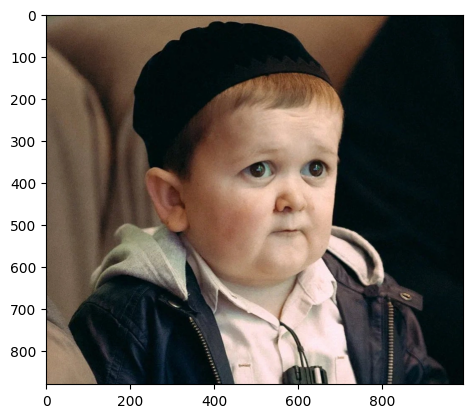

In [4]:
imagen = Image.open('Hasbulla_Magomedov.webp')

imagen.save('Hasbulla_Magomedov.png', 'PNG')

imagen_png = plt.imread('Hasbulla_Magomedov.png')
plt.imshow(imagen_png);

Verificamos el número total de pixeles

In [5]:
imagen_png.size

2627142

así como el número de dimensiones

In [6]:
imagen_png.ndim

3

Esto significa que la imagen tiene altura, anchura y una dimensión para los colores

In [7]:
imagen_png.shape

(881, 994, 3)

La imagen tiene 881 pixeles de altura, 994 de anchura y 3 canales de color (RGB: Red, Green, Blue)

In [8]:
881 * 994 * 3 == imagen_png.size

True

Ahora, exploraremos qué sucede si se promedian las intensidades de los 3 colores:

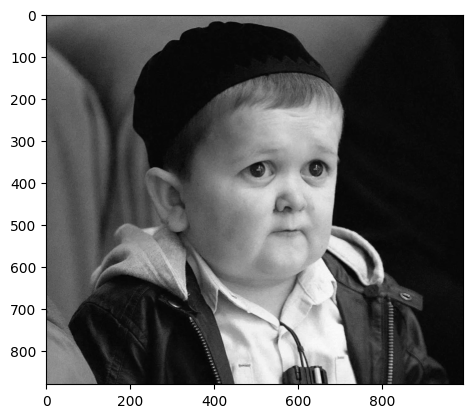

In [9]:
imagen_grises = imagen_png.mean(axis=2)
plt.imshow(imagen_grises, cmap="gray");

Donde además se escogió el mapa de color en escala de grises.

¿Cómo podrían invertirse los colores de la imagen anterior? Esto se logra tomando el complemento (lo que le falta para llegar a 1) de los valores de intensidad para cada pixel. A continuación se muestra el resultado:

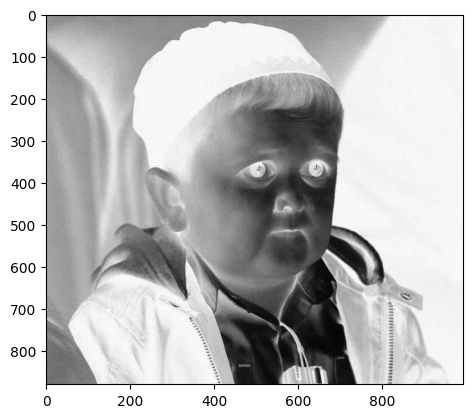

In [10]:
imagen_demoniaca = 1 - imagen_grises
plt.imshow(imagen_demoniaca, cmap="gray");

Definimos los valores en la matriz de convolución para darle una forma "Gaussiana", con el máximo en el centro y los mínimos en las esquinas:

In [12]:
conv_gauss = np.array([
    [0.025, 0.100, 0.025],
    [0.100, 0.500, 0.100],
    [0.025, 0.100, 0.025],
])

Se verifica que la suma de todos los elementos de la matriz de convolución gaussiana es igual a 1.

In [13]:
conv_gauss.sum()

np.float64(1.0)

Es posible tomar una sub sección de la imagen completa utilizando los métodos tradicionales de numpy para "rebanar" arrays:

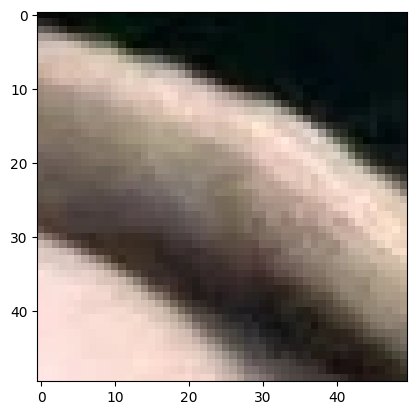

In [14]:
i, j, d = 505, 700, 50
ventana = imagen_png[i:i+d, j:j+d, 0:3]
plt.imshow(ventana);

En la imagen anterior se tomó un fragmento cuadrangular de 50x50 pixeles, centrado en (505,700).

Ahora se tomará un fragmento más pequeño de 3x3 pixeles, centrado en (0,0) y mapeado en escala de grises:

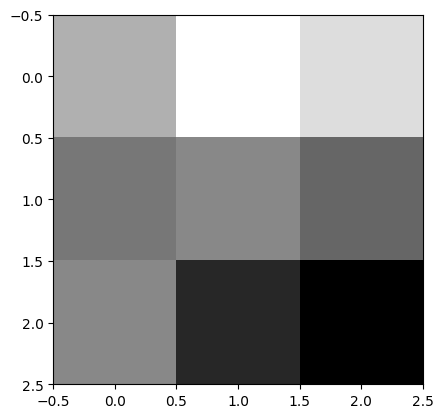

In [15]:
i, j, d = 0, 0, 3
ventana = imagen_grises[i:i+d, j:j+d]
plt.imshow(ventana, cmap="gray");

Se realiza la operación de convolución sobre el fragmento tomado anteriormente. Esto se logra multiplicando la ventana con la matriz de convolución gaussiana, elemento por elemento, y tomando la suma de estas multiplicaciones:

In [16]:
(ventana * conv_gauss).sum()

np.float64(0.40320262014865876)

Ahora se aplicará esta misma operación de convolución pero en toda la imagen, para producir una imagen nueva. Esto se logra moviendo la ventana a través de toda la imagen mediante ciclos 'for':

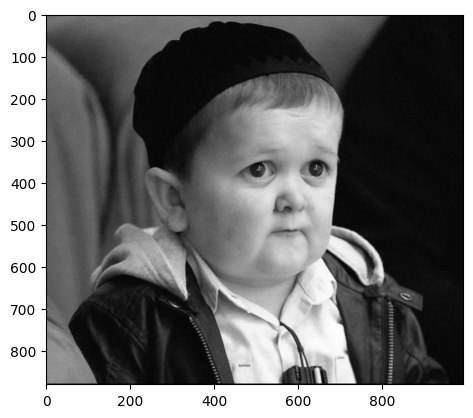

In [17]:
borrosa = np.zeros_like(imagen_grises)

alto, ancho = imagen_grises.shape

for i in range(1, alto - 1, 1):
    for j in range(1, ancho - 1, 1):
        ventana = imagen_grises[i-1:i+2, j-1:j+2]
        borrosa[i, j] = (ventana * conv_gauss).sum()

plt.imshow(borrosa, cmap="gray");

Otra alternativa para el rango de las iteraciones es comenzar en 0 y terminar dos casillas antes del borde, en contraste con el método anterior que comenzaba en 1 y termiinaba una casilla antes del borde:

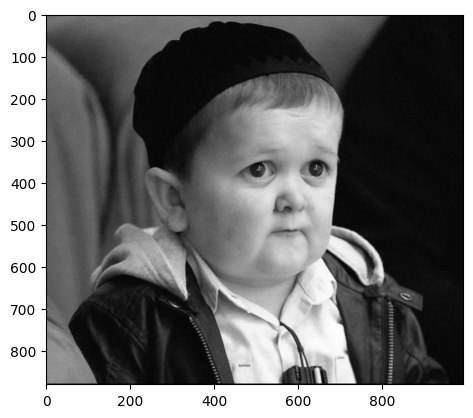

In [18]:
borrosa = np.zeros_like(imagen_grises)

alto, ancho = imagen_grises.shape

for i in range(0, alto - 2, 1):
    for j in range(0, ancho - 2, 1):
        ventana = imagen_grises[i:i+3, j:j+3]
        borrosa[i+1, j+1] = (ventana * conv_gauss).sum()

plt.imshow(borrosa, cmap="gray");

Aquí mostramos la imagen antes del filtro ('imagen_grises', abajo) y después del filtro ('borrosa', arriba). Notamos que la diferencia no es muy apreciable.

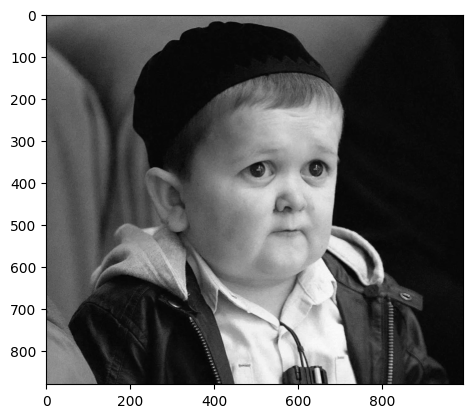

In [19]:
plt.imshow(imagen_grises, cmap="gray");

Ahora probamos con una matriz de convolución gaussiana diferente y repetimos el proceso:

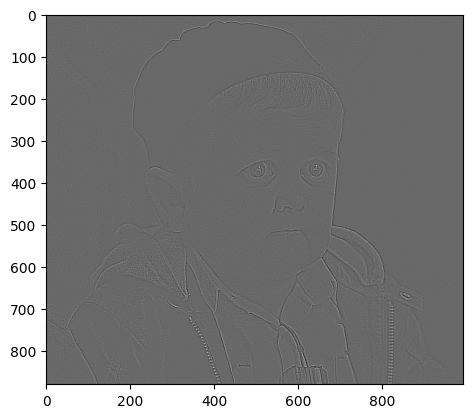

In [30]:
conv_gauss2 = np.array([
    [-100, +100, -100],
    [+100, 0000, +100],
    [-100, +100, -100],
]) * 100

borrosa2 = np.zeros_like(imagen_grises)

alto, ancho = imagen_grises.shape

for i in range(0, alto - 2, 1):
    for j in range(0, ancho - 2, 1):
        ventana = imagen_grises[i:i+3, j:j+3]
        borrosa2[i + 1, j + 1] = (ventana * conv_gauss2).sum()

plt.imshow(borrosa2, cmap="gray");

y observamos que la nueva imagen parece ser completamente gris, pero con algunos bordes a la vista.

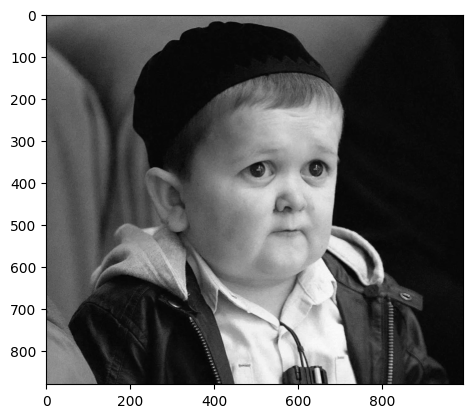

In [21]:
plt.imshow(imagen_grises, cmap="gray");

Procedemos ahora a cargar otra versión de la imagen original: 'Hasbulla_Magomedov_peque.png'

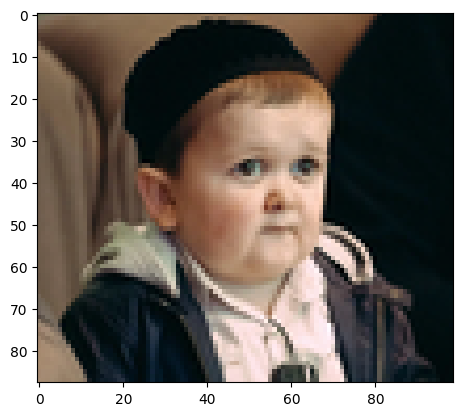

In [22]:
imagen_peque_png = plt.imread('Hasbulla_Magomedov_peque.png')
plt.imshow(imagen_peque_png);

Notando que esta nueva versión tiene menos resolución que la original.
Ahora se tomará el promedio de intensidad de color sobre los tres canales, y escogiendo el mapa de color apropiado para que la imagen se muestre en blanco y negro:

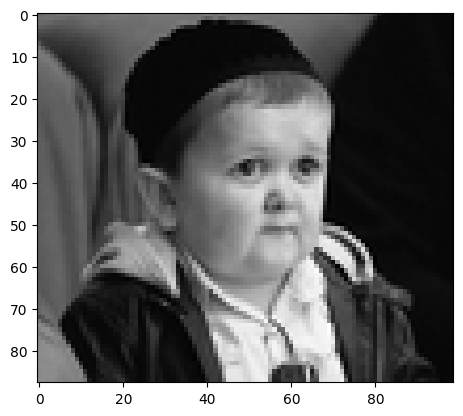

In [23]:
imagen_peque_grises = imagen_peque_png.mean(axis=2)
plt.imshow(imagen_peque_grises, cmap="gray");

Repitiendo el proceso de convolución para esta imagen:

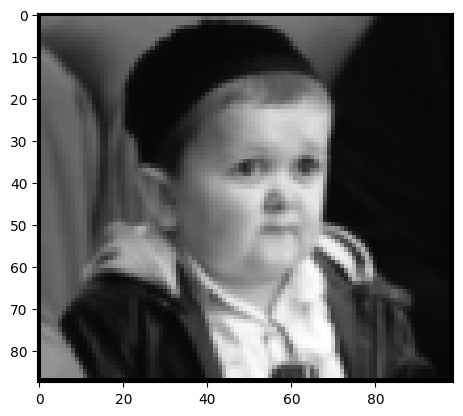

In [32]:
conv_gauss3 = np.array([
    [0.025, 0.100, 0.025],
    [0.100, 0.500, 0.100],
    [0.025, 0.100, 0.025],
])

borrosa3 = np.zeros_like(imagen_peque_grises)

alto, ancho = imagen_peque_grises.shape

for i in range(0, alto - 2, 1):
    for j in range(0, ancho - 2, 1):
        ventana = imagen_peque_grises[i:i+3, j:j+3]
        borrosa3[i + 1, j + 1] = (ventana * conv_gauss3).sum()

plt.imshow(borrosa3, cmap="gray");

Donde podemos notar que conv-gauss3 es igual a conv_gauss:

In [31]:
conv_gauss3 == conv_gauss

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

# Filtro de difuminado gaussinano con un kernel de dimensiones mas grandes que 3x3
¿Qué sucede si se realiza la convolución sobre una imagen, pero con un kernel más grande que 3x3? Averiguémoslo con un kernel de 5x5:

In [37]:
conv_gauss5x5 = np.array(
[[ 0.003, 0.013, 0.022, 0.013, 0.003],
 [ 0.013, 0.059, 0.097, 0.059, 0.013],
 [ 0.022, 0.097, 0.159, 0.097, 0.022],
 [ 0.013, 0.059, 0.097, 0.059, 0.013],
 [ 0.003, 0.013, 0.022, 0.013, 0.003]]
)

Ahora se repite el procedimiento de la sección anterior, modificando los rangos necesarios para encajar el kernel de 5x5:

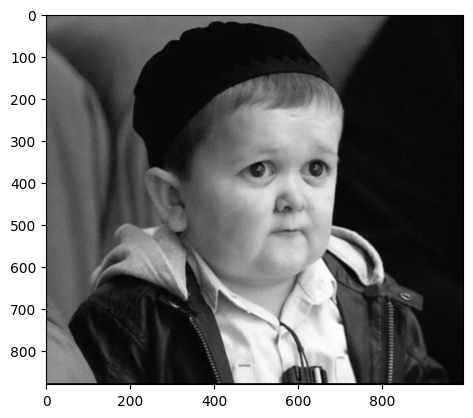

In [46]:
borrosa5 = np.zeros_like(imagen_grises)

alto, ancho = imagen_grises.shape

for i in range(2, alto - 2, 1):
    for j in range(2, ancho - 2, 1):
        ventana = imagen_grises[i-2:i+3, j-2:j+3]
        borrosa5[i, j] = (ventana * conv_gauss5x5).sum()

plt.imshow(borrosa5, cmap="gray");

No hay mucha diferencia visible entre la imagen antes y después de aplicarle el filtro.

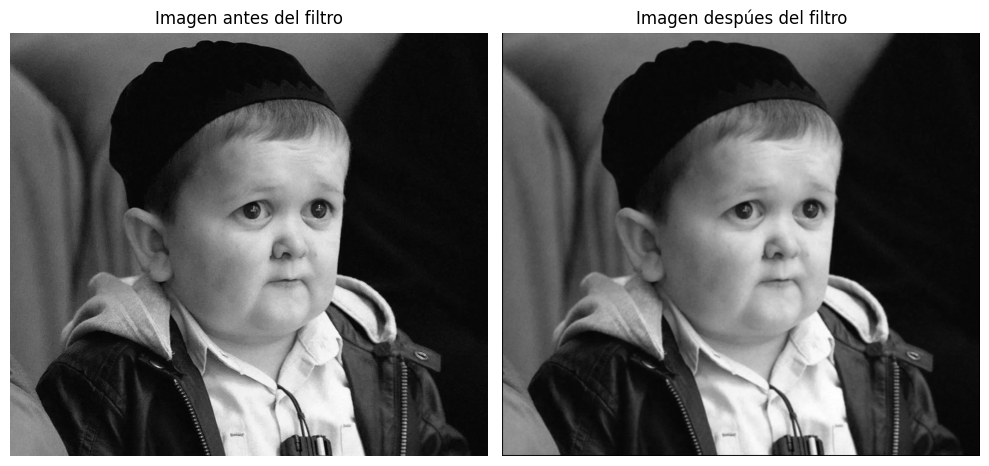

In [53]:
# Crear una figura y un grid de subplots (1 renglón, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

# Mostrar la primera imagen en el primer subplot
axes[0].imshow(imagen_grises, cmap='gray') # Use cmap='gray' for grayscale images
axes[0].set_title('Imagen antes del filtro')
axes[0].axis('off') # Esconder las marcas de los ejes y las etiquetas

# Mostrar la segunda imagen en el segundo subplot
axes[1].imshow(borrosa5, cmap='gray')
axes[1].set_title('Imagen despúes del filtro')
axes[1].axis('off') # Esconder las marcas de los ejes y las etiquetas

# Ajustar layout para prevenir que los títulos se traslapen
plt.tight_layout()

# Muestra la figura con ambas imagenes
plt.show()

Aquí se muestran ambas imagenes una al lado de la otra para poder compararlas visualmente mejor.

# Desarrollo de un filtro de "Sharpen"
En esta sección, pasaremos a desarrollar un filtro de Sharpen mediante un kernel apropiado de dimensiones 3x3:

In [51]:
sharpen_kernel_3x3 = np.array(
[
[0,-1,0],
[-1,5,-1],
[0,-1,0]
]
)

En el kernel anterior, el valor central es grande y positivo, y los laterales son negativos. Además la suma de todos los elementos es igual a 1.

Pasemos ahora a aplicar este kernel en toda la imagen, mediante los correspondientes ciclos "for":

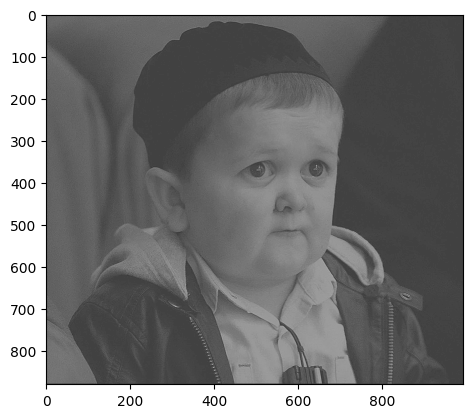

In [52]:
definida = np.zeros_like(imagen_grises)

alto, ancho = imagen_grises.shape

for i in range(0, alto - 2, 1):
    for j in range(0, ancho - 2, 1):
        ventana = imagen_grises[i:i+3, j:j+3]
        definida[i + 1, j + 1] = (ventana * sharpen_kernel_3x3).sum()

plt.imshow(definida, cmap="gray");

Sí se puede apreciar un cambio visible en la imagen. Para mejor comparación veamos las imágenes una al lado de la otra:

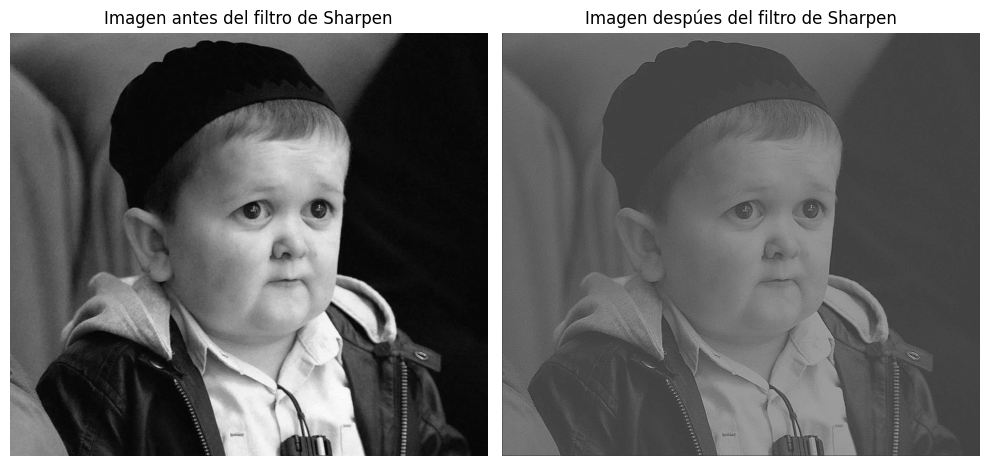

In [54]:
# Crear una figura y un grid de subplots (1 renglón, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

# Mostrar la primera imagen en el primer subplot
axes[0].imshow(imagen_grises, cmap='gray') # Use cmap='gray' for grayscale images
axes[0].set_title('Imagen antes del filtro de Sharpen')
axes[0].axis('off') # Esconder las marcas de los ejes y las etiquetas

# Mostrar la segunda imagen en el segundo subplot
axes[1].imshow(definida, cmap='gray')
axes[1].set_title('Imagen despúes del filtro de Sharpen')
axes[1].axis('off') # Esconder las marcas de los ejes y las etiquetas

# Ajustar layout para prevenir que los títulos se traslapen
plt.tight_layout()

# Muestra la figura con ambas imagenes
plt.show()

# Conclusion
Mediante estos ejercicios podemos ver que las imágenes pueden ser representadas mediante matrices conteniendo las intensidades de cada color para cada pixel; y que mediante el diseño y aplicación de matrices de convolución (o kernels) se pueden lograr diversos efectos en las imagenes, como por ejemplo un difuminado, un aumento en la resolución, etc. Estos filtros han hecho más sencilla la tarea de procesar imágenes.